### <center>**Rizki Rahman Maulana**</center>
#### <center>**F1D022093**</center>

# **Jurnal Modul IV**

In [209]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

Terlebih dahulu lakukan import library numpy untuk melakukan operasi numerik , cv2 untuk melakukan pengolahan citra dan matplotlib untuk visualisasi data.

Tampilkan gambar yang akan diproses dengan menggunakan library matplotlib.

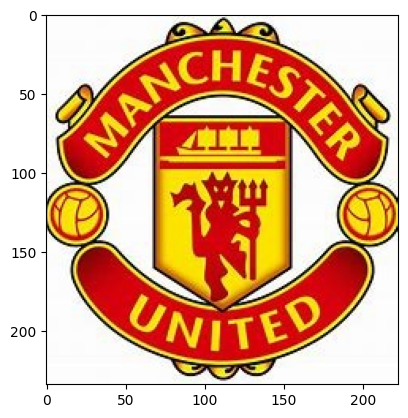

In [210]:
image = plt.imread('./assets/manchester_united.jpeg')
plt.imshow(image)

Konversi gambar sebelumnya ke skala abu-abu menggunakan library cv2.

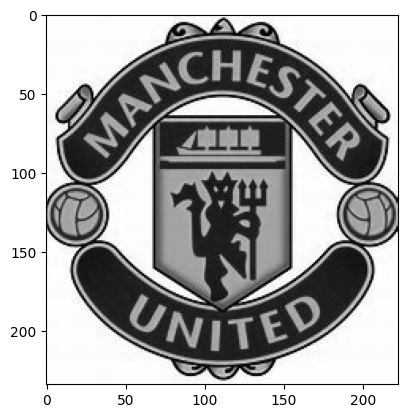

In [211]:
gray=cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

### **Pendefinisian Kernel**

In [212]:
kernel_3x3 = np.array([[1/9,1/9,1/9],
                       [1/9,1/9,1/9],
                       [1/9,1/9,1/9]])

kernel_9x9 = np.array([[1/81,1/81,1/81,1/81,1/81,1/81,1/81,1/81,1/81],
              [1/81,1/81,1/81,1/81,1/81,1/81,1/81,1/81,1/81],
              [1/81,1/81,1/81,1/81,1/81,1/81,1/81,1/81,1/81],
              [1/81,1/81,1/81,1/81,1/81,1/81,1/81,1/81,1/81],
              [1/81,1/81,1/81,1/81,1/81,1/81,1/81,1/81,1/81],
              [1/81,1/81,1/81,1/81,1/81,1/81,1/81,1/81,1/81],
              [1/81,1/81,1/81,1/81,1/81,1/81,1/81,1/81,1/81],
              [1/81,1/81,1/81,1/81,1/81,1/81,1/81,1/81,1/81],
              [1/81,1/81,1/81,1/81,1/81,1/81,1/81,1/81,1/81]])

Kode tersebut mendefinisikan dua kernel untuk operasi Mean,Median dan Modus. Kernel pertama adalah matriks 3x3 dengan semua elemen bernilai 1/9 dan kernel kedua adalah matriks 9x9 dengan semua elemen bernilai 1/81.

In [213]:
kernelSS1 = np.array([[1/10,1/10,1/10],
             [1/10,1/5,1/10],
             [1/10,1/10,1/10]])

kernelSS2 = np.array([[1/9,1/9,1/9],
             [1/9,8/9,1/9],
             [1/9,1/9,1/9]])

Kode tersebut mendefinisikan dua kernel untuk operasi Sharpening dan Smoothing. Kernel pertama dan kedua adalah matriks 3x3 dengan nilai yang tertera sesuai soal jurnal.

In [214]:
sobelX = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
    ])
sobelY = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
    ])

Kode tersebut mendefinisikan dua kernel Sobel untuk deteksi tepi dalam citra. Kernel pertama, sobelX, digunakan untuk mendeteksi tepi horizontal, sementara kernel kedua, sobelY, digunakan untuk mendeteksi tepi vertikal.

In [215]:
prewitx = np.array([[-1, 0, 1],
               [-1, 0, 1],
               [-1, 0, 1]])

prewity = np.array([[1, 1, 1],
               [0, 0, 0],
               [-1, -1, -1]])

Kode tersebut mendefinisikan dua kernel Prewitt untuk deteksi tepi dalam citra. Kernel prewitx digunakan untuk mendeteksi tepi horizontal dengan memperhatikan perbedaan intensitas di sepanjang sumbu x, sedangkan kernel prewity digunakan untuk mendeteksi tepi vertikal dengan memperhatikan perbedaan intensitas di sepanjang sumbu y.

In [216]:
robertx = np.array([[1, 0],
               [0, -1]])

roberty = np.array([[0, 1],
               [-1, 0]])


Kode tersebut mendefinisikan dua kernel Robert untuk deteksi tepi dalam citra. Kernel robertx digunakan untuk mendeteksi tepi horizontal dengan mengidentifikasi perbedaan intensitas di sepanjang sumbu x, sementara kernel roberty digunakan untuk mendeteksi tepi vertikal dengan mengidentifikasi perbedaan intensitas di sepanjang sumbu y.

## **Soal Nomor 1&2**

#### **Pendefinisian Fungsi-fungsi**

In [217]:
def mean(window):
    total_sum = 0
    count = 0
    for row in window:
        for val in row:
            total_sum += val
            count += 1
    return int(total_sum / count) 

Fungsi mean tersebut menghitung rata-rata dari nilai-nilai dalam sebuah jendela (window) yang merupakan matriks. Fungsi ini menjumlahkan semua nilai dalam jendela dan menghitung jumlah total elemen. Kemudian, rata-rata dihitung dengan membagi jumlah keseluruhan oleh jumlah elemen, dan hasilnya diubah menjadi integer sebelum dikembalikan.

In [218]:
def median(window):
    sorted_vals = []
    for row in window:
        for val in row:
            sorted_vals.append(val)
    sorted_vals.sort()
    mid_index = len(sorted_vals) // 2
    if len(sorted_vals) % 2 == 0:
        return (sorted_vals[mid_index - 1] + sorted_vals[mid_index]) // 2
    else:
        return sorted_vals[mid_index]


Fungsi median tersebut menghitung nilai median dari nilai-nilai dalam sebuah jendela (window) yang merupakan matriks. Nilai-nilai dalam jendela diurutkan secara berurutan, dan median dihitung berdasarkan jumlah elemen dalam jendela. Jika jumlah elemen ganjil, maka nilai tengah dijadikan sebagai median. Namun, jika jumlah elemen genap, maka rata-rata dari dua nilai tengah dijadikan sebagai median.

In [219]:
def modus(window):
    frequency = {}
    for row in window:
        for val in row:
            if val in frequency:
                frequency[val] += 1
            else:
                frequency[val] = 1
    max_freq = 0
    modus = window[0][0]
    for val, freq in frequency.items():
        if freq > max_freq:
            max_freq = freq
            modus = val
    return modus

Fungsi modus tersebut menghitung nilai modus dari nilai-nilai dalam sebuah jendela (window) yang merupakan matriks. Untuk setiap nilai dalam jendela, frekuensinya dihitung dan disimpan dalam frequency. Nilai modus dan frekuensinya yang paling tinggi diidentifikasi melalui iterasi kamus, dan nilai modus tersebut dikembalikan sebagai hasil fungsi. Jika ada beberapa nilai dengan frekuensi yang sama, fungsi ini akan mengembalikan nilai yang pertama kali ditemukan dalam iterasi.

In [220]:
def apply_filter(img, kernel, filter_type, pad_mode='reflect'):
    pad_width = (kernel.shape[0] - 1) // 2
    padded_img = np.pad(img, pad_width, mode=pad_mode) 
    output = np.zeros_like(img)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            window = padded_img[i:i+kernel.shape[0], j:j+kernel.shape[1]]
            
            if filter_type == 'mean':
                output[i, j] = mean(window)
            elif filter_type == 'median':
                output[i, j] = median(window)
            elif filter_type == 'modus':
                output[i, j] = modus(window)
    return output

Fungsi apply_filter ini menerapkan filter spasial pada citra menggunakan kernel tertentu dan jenis filter yang ditentukan. Citra diperluas terlebih dahulu sesuai dengan ukuran kernel untuk memastikan operasi filter dapat dilakukan pada piksel di tepi citra. Kemudian, filter diterapkan pada setiap piksel dalam citra dengan mengambil jendela (window) seukuran kernel di sekitar piksel tersebut. Filter yang dapat diterapkan termasuk filter rata-rata, median, dan modus. Hasil dari operasi filter kemudian dikembalikan sebagai citra yang telah difilter.

In [221]:
def quality_image(image, kernel, pad_mode='reflect'):
    height, width = image.shape
    filtered_image = np.zeros((height, width))

    pad_height = (kernel.shape[0] - 1) // 2
    pad_width = (kernel.shape[1] - 1) // 2
    
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode=pad_mode)
    for i in range(pad_height, height + pad_height):
        for j in range(pad_width, width + pad_width):
            filtered_pixel = np.sum(kernel * padded_image[i-pad_height:i+pad_height+1, j-pad_width:j+pad_width+1])
            
            filtered_image[i-pad_height][j-pad_width] = filtered_pixel
    return filtered_image

Fungsi quality_image ini memperbaiki implementasi operasi konvolusi pada citra. Dengan memanfaatkan ukuran kernel, fungsi ini melakukan perhitungan pada citra yang diperluas/dipad terlebih dahulu dengan menggunakan pola padding yang ditentukan (secara default menggunakan pola 'reflect'). Kemudian, filter diterapkan pada setiap piksel dalam citra dengan menggunakan operasi konvolusi.

In [222]:
mean_3x3 = apply_filter(gray, kernel_3x3, 'mean')
median_3x3 = apply_filter(gray, kernel_3x3, 'median')
modus_3x3 = apply_filter(gray, kernel_3x3, 'modus')

mean_9x9 = apply_filter(gray, kernel_9x9, 'mean')
median_9x9 = apply_filter(gray, kernel_9x9, 'median')
modus_9x9 = apply_filter(gray, kernel_9x9, 'modus')

smooth= quality_image(gray, kernelSS1)
sharp = quality_image(gray, kernelSS2)


kode diatas menerapkan filter berbeda pada citra gray. Filter yang digunakan termasuk filter mean, median, dan modus dengan kernel 3x3 dan 9x9. Selain itu, kode juga menerapkan dua operasi smooth dan sharp menggunakan filter yang disimpan dalam kernel kernelSS1 dan kernelSS2 secara berturut-turut.

#### **Tampilan Hasil**

Kode dibawah menampilkan citra yang telah difilter dengan berbagai filter dan kernel yang telah ditentukan sebelumnya. Lalu disatukan dan diurutkan dengan subplots.

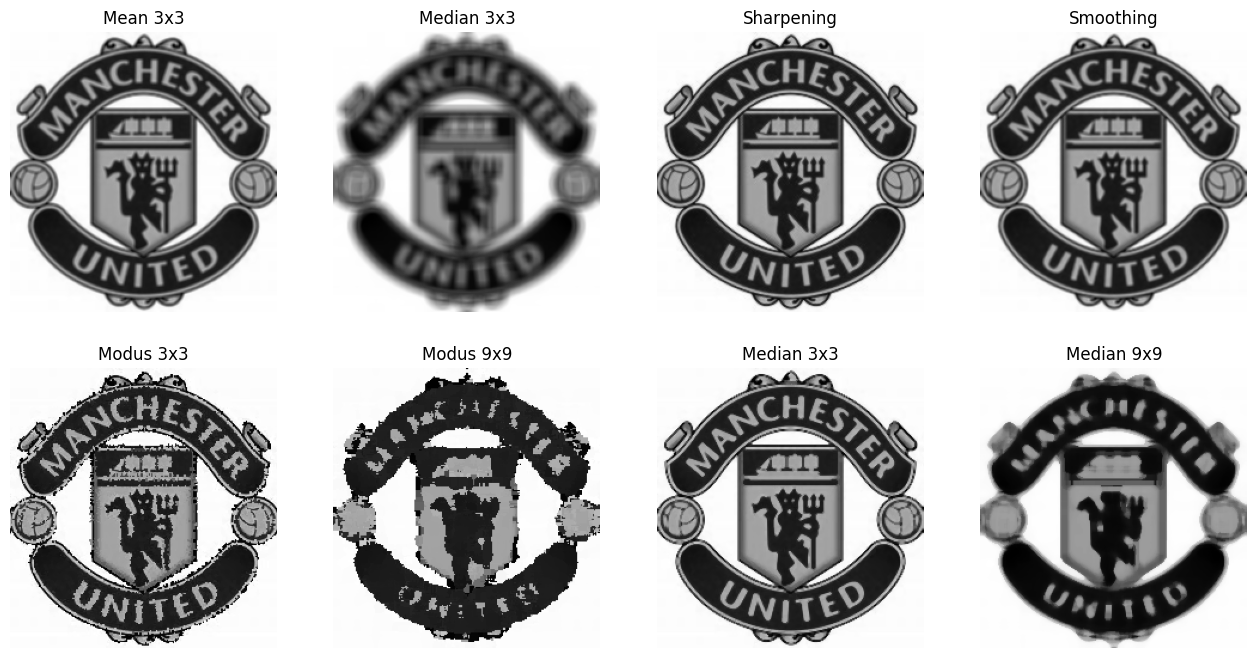

In [223]:

fig, axs = plt.subplots(2, 4, figsize=(16, 8))

axs[0, 0].imshow(mean_3x3, cmap='gray')
axs[0, 0].set_title('Mean 3x3')
axs[0, 0].axis('off')

axs[0, 1].imshow(mean_9x9, cmap='gray')
axs[0, 1].set_title('Median 3x3')
axs[0, 1].axis('off')

axs[0, 2].imshow(sharp, cmap='gray')
axs[0, 2].set_title('Sharpening')
axs[0, 2].axis('off')

axs[0, 3].imshow(smooth, cmap='gray')
axs[0, 3].set_title('Smoothing')
axs[0, 3].axis('off')

axs[1, 0].imshow(modus_3x3, cmap='gray')
axs[1, 0].set_title('Modus 3x3')
axs[1, 0].axis('off')

axs[1, 1].imshow(modus_9x9, cmap='gray')
axs[1, 1].set_title('Modus 9x9')
axs[1, 1].axis('off')

axs[1, 2].imshow(median_3x3, cmap='gray')
axs[1, 2].set_title('Median 3x3')
axs[1, 2].axis('off')

axs[1, 3].imshow(median_9x9, cmap='gray')
axs[1, 3].set_title('Median 9x9')
axs[1, 3].axis('off')
plt.show()

## **Soal Nomor 3**

#### **Operator Sobel,Prewitt, dan Roberts**

In [224]:
def convolution(image, kernel):
    pad_size = kernel.shape[0] // 2
    padded_image = np.pad(image, pad_size, mode='constant')
    output_image = np.zeros_like(image).astype(np.float32)

    height, width = image.shape
    for i in range(height):
        for j in range(width):
            output_image[i, j] = np.sum(padded_image[i:i + kernel.shape[0], j:j + kernel.shape[1]] * kernel)

    return output_image


Kode diatas mendefinisikan operasi konvolusi pada citra menggunakan kernel yang diberikan. Citra diperluas terlebih dahulu dengan ukuran padding yang sesuai dengan ukuran kernel. Selanjutnya, operasi konvolusi dilakukan pada setiap piksel dalam citra dengan mengalikan kernel dengan bagian citra yang berkorespondensi. 

In [ ]:
def edge_detection(image, kernel_x, kernel_y):

    edge_x = convolution(image, kernel_x)
    edge_y = convolution(image, kernel_y)
    
    edge_magnitude = np.sqrt(edge_x ** 2 + edge_y ** 2)
    edge_direction = np.arctan2(edge_y, edge_x)

    return edge_magnitude, edge_direction

Fungsi edge_detection ini mengimplementasikan deteksi tepi pada citra menggunakan metode operator Sobel. Pertama, citra dimasukkan ke dalam fungsi convolution dua kali, masing-masing dengan kernel Sobel untuk mendeteksi tepi horizontal dan vertikal. Hasilnya adalah dua citra yang mewakili gradien tepi dalam arah-x dan arah-y. Selanjutnya, magnitudo gradien tepi dihitung dari kedua citra tersebut menggunakan rumus Euclidean distance, sedangkan arah gradien tepi dihitung menggunakan rumus arctan.

#### **Operator Sobel**

Kode ini menerapkan deteksi tepi pada citra yang telah difilter sebelumnya menggunakan operator Sobel. Citra-citra yang telah difilter dengan berbagai metode, seperti rata-rata, median, dan modus dengan kernel 3x3 dan 9x9, kemudian dimasukkan ke dalam fungsi edge_detection. Lalu ditampilkan dengan subplots.

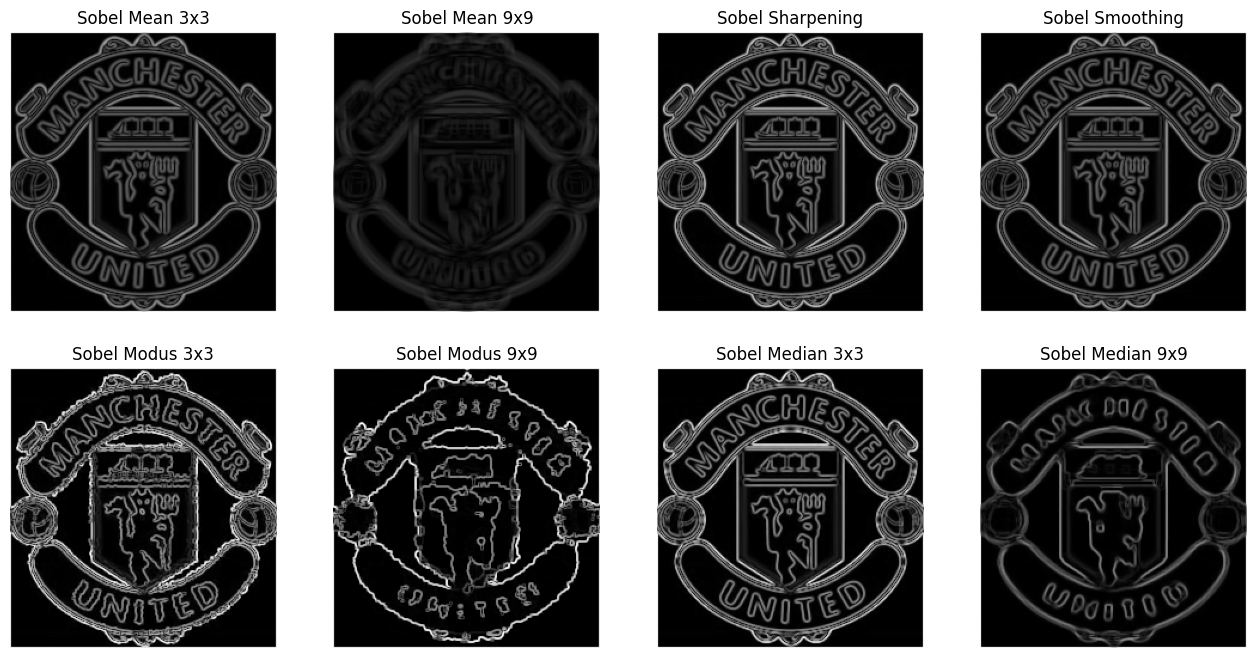

In [225]:
Smean_3x3, _ = edge_detection(mean_3x3, sobelX, sobelY)
Smean_9x9, _ = edge_detection(mean_9x9, sobelX, sobelY)
Ssharp, _ = edge_detection(sharp, sobelX, sobelY)
Ssmooth, _ = edge_detection(smooth, sobelX, sobelY)
Smodus_3x3, _ = edge_detection(modus_3x3, sobelX, sobelY)
Smodus_9x9, _ = edge_detection(modus_9x9, sobelX, sobelY)
Smedian_3x3, _ = edge_detection(median_3x3, sobelX, sobelY)
Smedian_9x9, _ = edge_detection(median_9x9, sobelX, sobelY)

fig, axs = plt.subplots(2, 4, figsize=(16, 8))

axs[0, 0].imshow(Smean_3x3, cmap='gray')
axs[0, 0].set_title('Sobel Mean 3x3')
axs[0, 0].axis('off')

axs[0, 1].imshow(Smean_9x9, cmap='gray')
axs[0, 1].set_title('Sobel Mean 9x9')
axs[0, 1].axis('off')

axs[0, 2].imshow(Ssharp, cmap='gray')
axs[0, 2].set_title('Sobel Sharpening')
axs[0, 2].axis('off')

axs[0, 3].imshow(Ssmooth, cmap='gray')
axs[0, 3].set_title('Sobel Smoothing')
axs[0, 3].axis('off')

axs[1, 0].imshow(Smodus_3x3, cmap='gray')
axs[1, 0].set_title('Sobel Modus 3x3')
axs[1, 0].axis('off')

axs[1, 1].imshow(Smodus_9x9, cmap='gray')
axs[1, 1].set_title('Sobel Modus 9x9')
axs[1, 1].axis('off')

axs[1, 2].imshow(Smedian_3x3, cmap='gray')
axs[1, 2].set_title('Sobel Median 3x3')
axs[1, 2].axis('off')

axs[1, 3].imshow(Smedian_9x9, cmap='gray')
axs[1, 3].set_title('Sobel Median 9x9')
axs[1, 3].axis('off')

plt.show()

#### **Operator Prewitt**

Kode ini menerapkan deteksi tepi pada citra yang telah difilter sebelumnya menggunakan operator Prewitt. Citra-citra yang telah difilter dengan berbagai metode, seperti rata-rata, median, dan modus dengan kernel 3x3 dan 9x9, kemudian dimasukkan ke dalam fungsi edge_detection. Lalu ditampilkan dengan subplots.

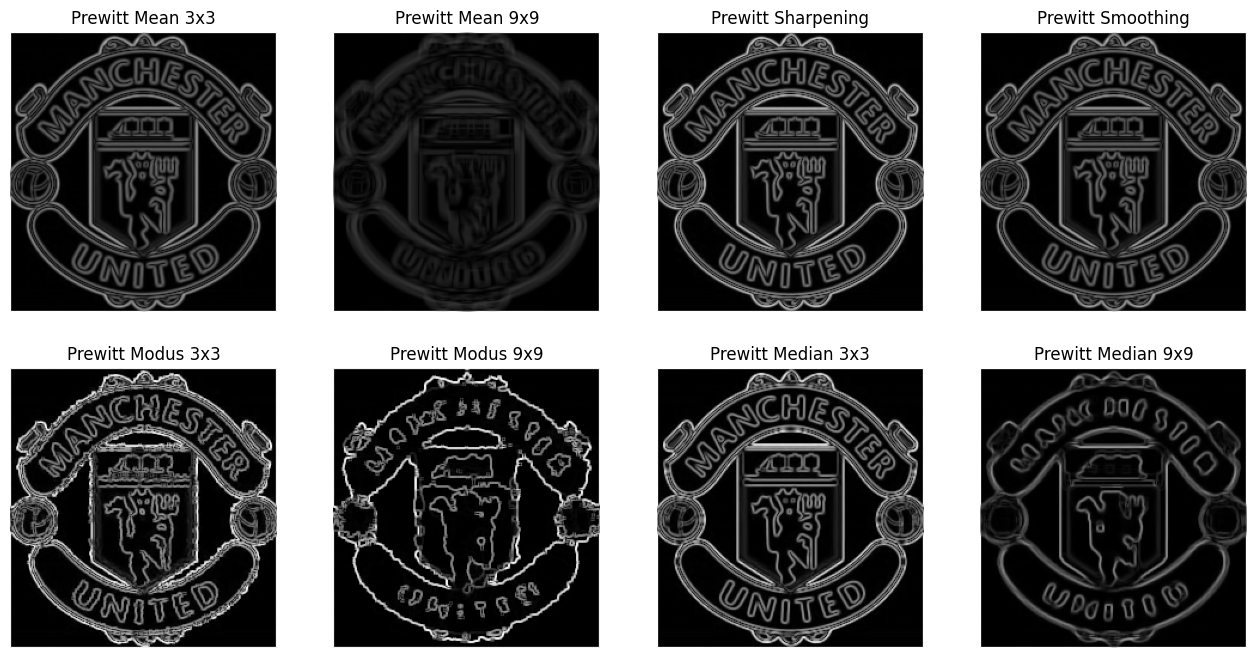

In [226]:
Pmean_3x3, _ = edge_detection(mean_3x3, prewitx, prewity)
Pmean_9x9, _ = edge_detection(mean_9x9, prewitx, prewity)
Psharp, _ = edge_detection(sharp, prewitx, prewity)
Psmooth, _ = edge_detection(smooth, prewitx, prewity)
Pmodus_3x3, _ = edge_detection(modus_3x3, prewitx, prewity)
Pmodus_9x9, _ = edge_detection(modus_9x9, prewitx, prewity)
Pmedian_3x3, _ = edge_detection(median_3x3, prewitx, prewity)
Pmedian_9x9, _ = edge_detection(median_9x9, prewitx, prewity)

fig, axs = plt.subplots(2, 4, figsize=(16, 8))

axs[0, 0].imshow(Pmean_3x3, cmap='gray')
axs[0, 0].set_title('Prewitt Mean 3x3')
axs[0, 0].axis('off')

axs[0, 1].imshow(Pmean_9x9, cmap='gray')
axs[0, 1].set_title('Prewitt Mean 9x9')
axs[0, 1].axis('off')

axs[0, 2].imshow(Psharp, cmap='gray')
axs[0, 2].set_title('Prewitt Sharpening')
axs[0, 2].axis('off')

axs[0, 3].imshow(Psmooth, cmap='gray')
axs[0, 3].set_title('Prewitt Smoothing')
axs[0, 3].axis('off')

axs[1, 0].imshow(Pmodus_3x3, cmap='gray')
axs[1, 0].set_title('Prewitt Modus 3x3')
axs[1, 0].axis('off')

axs[1, 1].imshow(Pmodus_9x9, cmap='gray')
axs[1, 1].set_title('Prewitt Modus 9x9')
axs[1, 1].axis('off')

axs[1, 2].imshow(Pmedian_3x3, cmap='gray')
axs[1, 2].set_title('Prewitt Median 3x3')
axs[1, 2].axis('off')

axs[1, 3].imshow(Pmedian_9x9, cmap='gray')
axs[1, 3].set_title('Prewitt Median 9x9')
axs[1, 3].axis('off')

plt.show()

#### **Operator Roberts**

Kode ini menerapkan deteksi tepi pada citra yang telah difilter sebelumnya menggunakan operator Sobel. Citra-citra yang telah difilter dengan berbagai metode, seperti rata-rata, median, dan modus dengan kernel 3x3 dan 9x9, kemudian dimasukkan ke dalam fungsi edge_detection. Lalu ditampilkan dengan subplots.

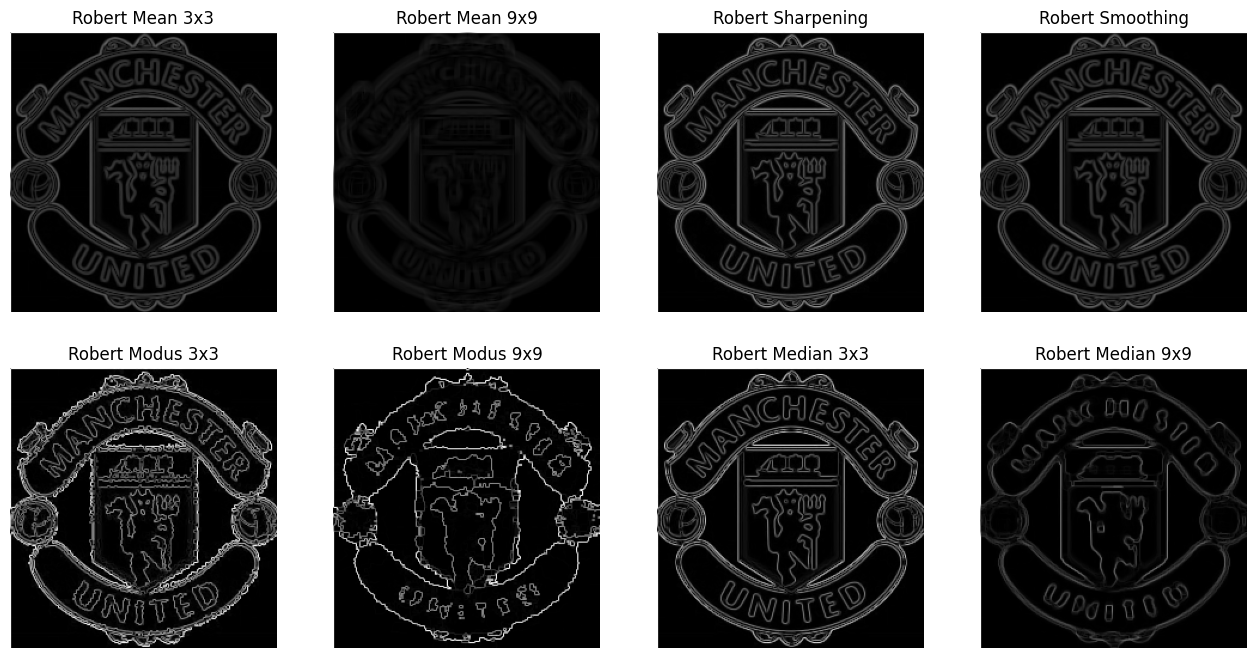

In [227]:
Rmean_3x3, _ = edge_detection(mean_3x3, robertx, roberty)
Rmean_9x9, _ = edge_detection(mean_9x9, robertx, roberty)
Rsharp, _ = edge_detection(sharp, robertx, roberty)
Rsmooth, _ = edge_detection(smooth, robertx, roberty)
Rmodus_3x3, _ = edge_detection(modus_3x3, robertx, roberty)
Rmodus_9x9, _ = edge_detection(modus_9x9, robertx, roberty)
Rmedian_3x3, _ = edge_detection(median_3x3, robertx, roberty)
Rmedian_9x9, _ = edge_detection(median_9x9, robertx, roberty)

fig, axs = plt.subplots(2, 4, figsize=(16, 8))

axs[0, 0].imshow(Rmean_3x3, cmap='gray')
axs[0, 0].set_title('Robert Mean 3x3')
axs[0, 0].axis('off')

axs[0, 1].imshow(Rmean_9x9, cmap='gray')
axs[0, 1].set_title('Robert Mean 9x9')
axs[0, 1].axis('off')

axs[0, 2].imshow(Rsharp, cmap='gray')
axs[0, 2].set_title('Robert Sharpening')
axs[0, 2].axis('off')

axs[0, 3].imshow(Rsmooth, cmap='gray')
axs[0, 3].set_title('Robert Smoothing')
axs[0, 3].axis('off')

axs[1, 0].imshow(Rmodus_3x3, cmap='gray')
axs[1, 0].set_title('Robert Modus 3x3')
axs[1, 0].axis('off')

axs[1, 1].imshow(Rmodus_9x9, cmap='gray')
axs[1, 1].set_title('Robert Modus 9x9')
axs[1, 1].axis('off')

axs[1, 2].imshow(Rmedian_3x3, cmap='gray')
axs[1, 2].set_title('Robert Median 3x3')
axs[1, 2].axis('off')

axs[1, 3].imshow(Rmedian_9x9, cmap='gray')
axs[1, 3].set_title('Robert Median 9x9')
axs[1, 3].axis('off')

plt.show()
